The implementation of the first order linear Fredholm and Volterra integral equation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.debugger import Pdb

In [2]:
# Define a function to calculate the index
def index(i):
    """
    Calculate the step-value of the i-th Haar wavelet
    """
    j = int(np.ceil(np.log2(i))) - 1
    k = int(i - 2 ** j) - 1
    return j, k

In [3]:
# Define the Haar wavelet function
def haar(x, i):
    """
    x: the input value
    i: the index of the wavelet function
    
    return: the value of the wavelet function
    """
    if i == 1:
        if 0 <= x and x < 1:
            return 1
        else:
            return 0
    if i >= 2:
        j, k = index(i) # j is the scale, k is the translation
        m = 2 ** j
        alpha = k / m
        beta = (k + 0.5) / m
        gamma = (k + 1) / m
        if alpha <= x and x < beta:
            return 1
        elif beta <= x and x < gamma:
            return -1
        else:
            return 0

In [4]:
# define the Haar wavelet function for input is a vector
def haar_vec(x, i):
    """
    x: input vector
    i: the index of the Haar wavelet function

    return: the Haar wavelet function
    """
    if i == 1:
        return np.ones(len(x))
    if i >= 2:
        j, k = index(i) # j is the scale, k is the translation
        m = 2 ** j
        alpha = k / m
        beta = (k + 0.5) / m
        gamma = (k + 1) / m
        a = (x>=alpha) & (x<beta) 
        b = (x>=beta) & (x<=gamma)
        b = b.astype(int)
        a = a.astype(int)
        c = a - b
        return c

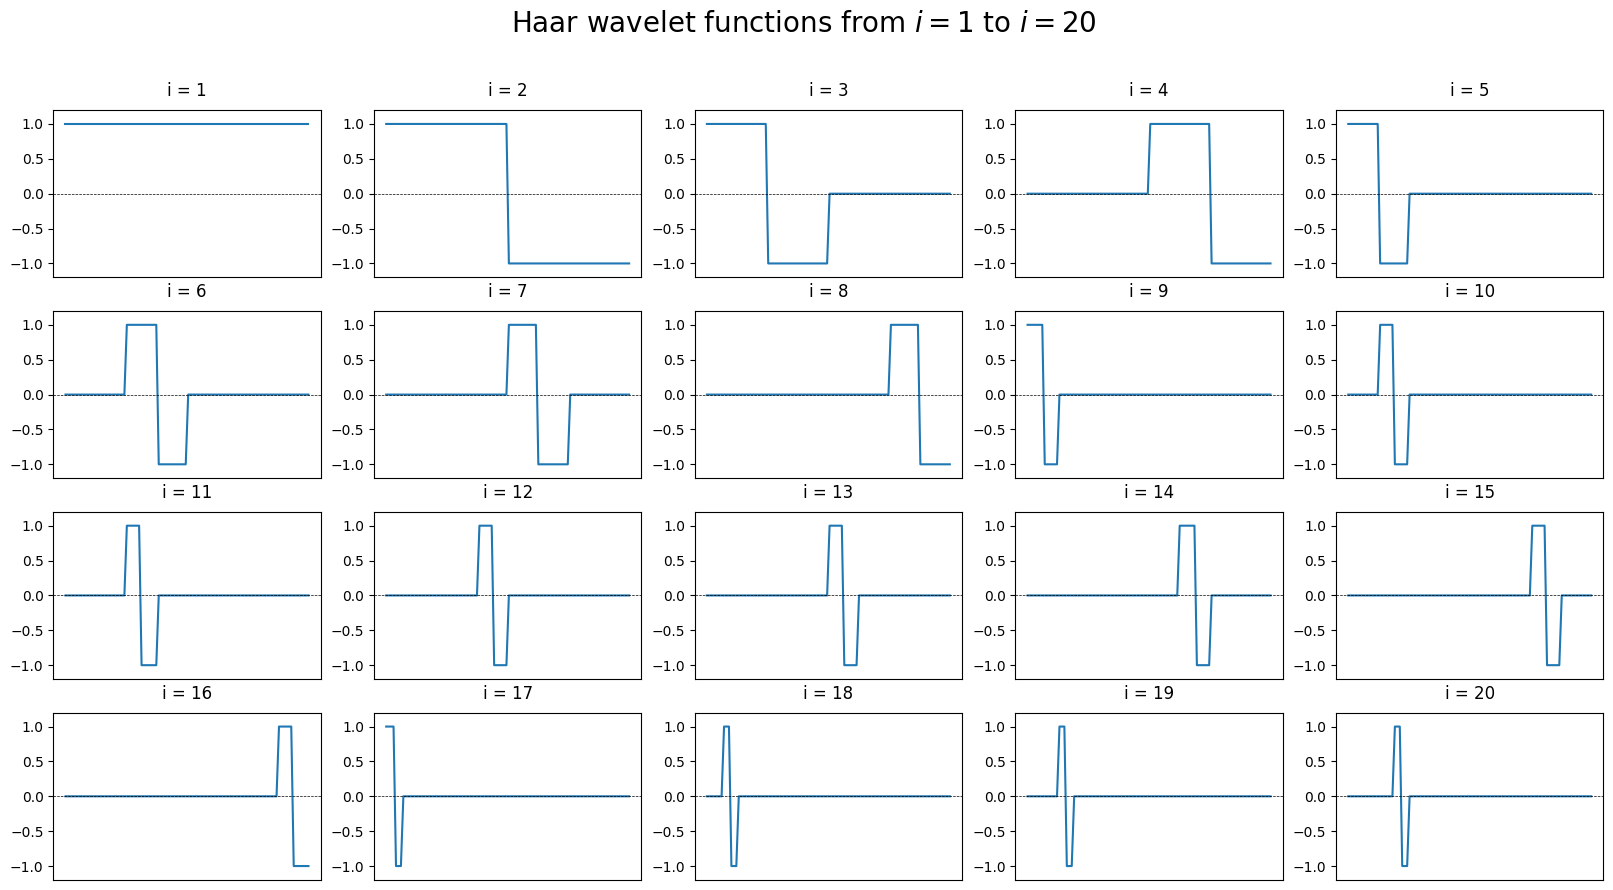

In [5]:
# plot the Haar wavelet function
fig, ax = plt.subplots(4, 5, figsize=(20, 10))
x = np.linspace(0, 1, 100)
for i in range(1, 21):
    ax[int((i - 1) / 5), (i - 1) % 5].plot(x, haar_vec(x, i))
    ax[int((i - 1) / 5), (i - 1) % 5].get_xaxis().set_visible(False) # make x-axis do not show
    ax[int((i - 1) / 5), (i - 1) % 5].set_title('i = ' + str(i), pad=10)
    ax[int((i - 1) / 5), (i - 1) % 5].set_ylim(-1.2, 1.2)
    ax[int((i - 1) / 5), (i - 1) % 5].axhline(y=0, color='k', linewidth=0.5, linestyle='--')
fig.suptitle('Haar wavelet functions from $i = 1$ to $i = 20$', fontsize=20)
plt.show()

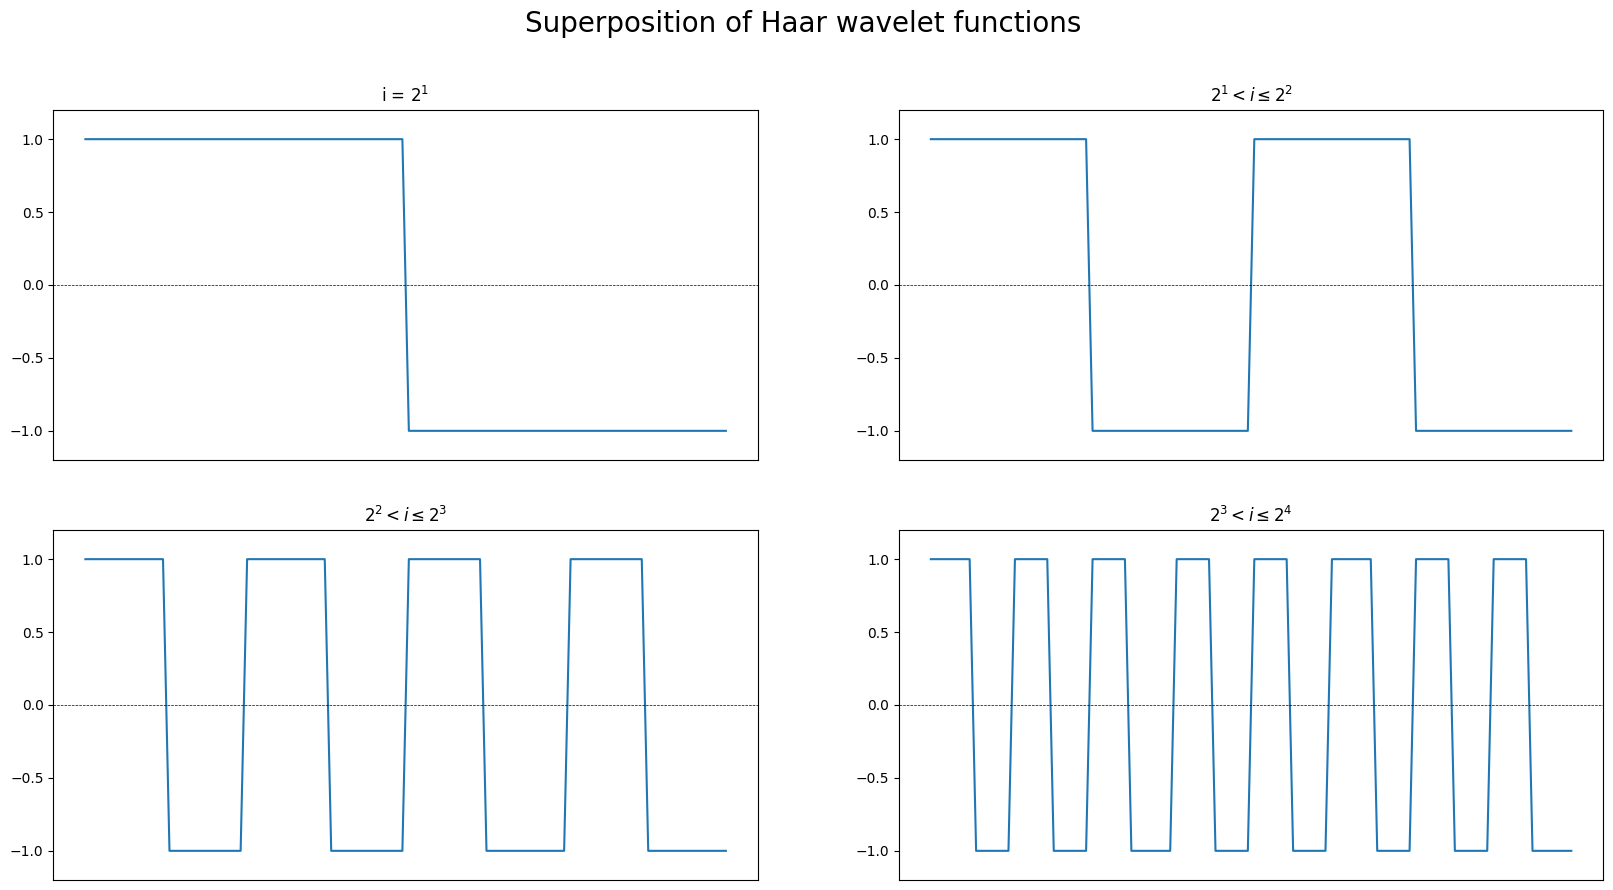

In [6]:
# plot the overlap of the Haar wavelet function
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
x = np.linspace(0, 1, 100)
ax[0, 0].plot(x, haar_vec(x, 2))
ax[0, 0].title.set_text('i = $2^{1}$')
ax[0, 0].set_ylim(-1.2, 1.2)
ax[0, 0].axhline(y=0, color='k', linewidth=0.5, linestyle='--')
ax[0, 0].get_xaxis().set_visible(False)

y = np.zeros(len(x))
for i in range(3, 5):
    y += haar_vec(x, i)
ax[0, 1].plot(x, y)
ax[0, 1].title.set_text('$2^{1} < i \leq 2^{2}$')
ax[0, 1].set_ylim(-1.2, 1.2)
ax[0, 1].axhline(y=0, color='k', linewidth=0.5, linestyle='--')
ax[0, 1].get_xaxis().set_visible(False)

y = np.zeros(len(x))
for i in range(5, 9):
    y += haar_vec(x, i)
ax[1, 0].plot(x, y)
ax[1, 0].title.set_text('$2^{2} < i \leq 2^{3}$')
ax[1, 0].set_ylim(-1.2, 1.2)
ax[1, 0].axhline(y=0, color='k', linewidth=0.5, linestyle='--')
ax[1, 0].get_xaxis().set_visible(False)

y = np.zeros(len(x))
for i in range(9, 17):
    y += haar_vec(x, i)
ax[1, 1].plot(x, y)
ax[1, 1].title.set_text('$2^{3} < i \leq 2^{4}$')
ax[1, 1].set_ylim(-1.2, 1.2)
ax[1, 1].axhline(y=0, color='k', linewidth=0.5, linestyle='--')
ax[1, 1].get_xaxis().set_visible(False)

fig.suptitle('Superposition of Haar wavelet functions', fontsize=20)
plt.show()

In [7]:
# define the function for first-order integration of the Haar wavelet function
def haar_int_1(x, i):
    """
    x: input vector
    i: the index of the Haar wavelet function

    return: the integration of the Haar wavelet function
    """
    if i == 1:
        return x
    if i >= 2:
        j, k = index(i) # j is the scale, k is the translation
        m = 2 ** j
        alpha = k / m
        beta = (k + 0.5) / m
        gamma = (k + 1) / m
        a = (x>=alpha) & (x<beta) 
        b = (x>=beta) & (x<=gamma)
        b = b.astype(int)
        a = a.astype(int)
        c = a * (x - alpha) - b * (x - gamma)
        return c

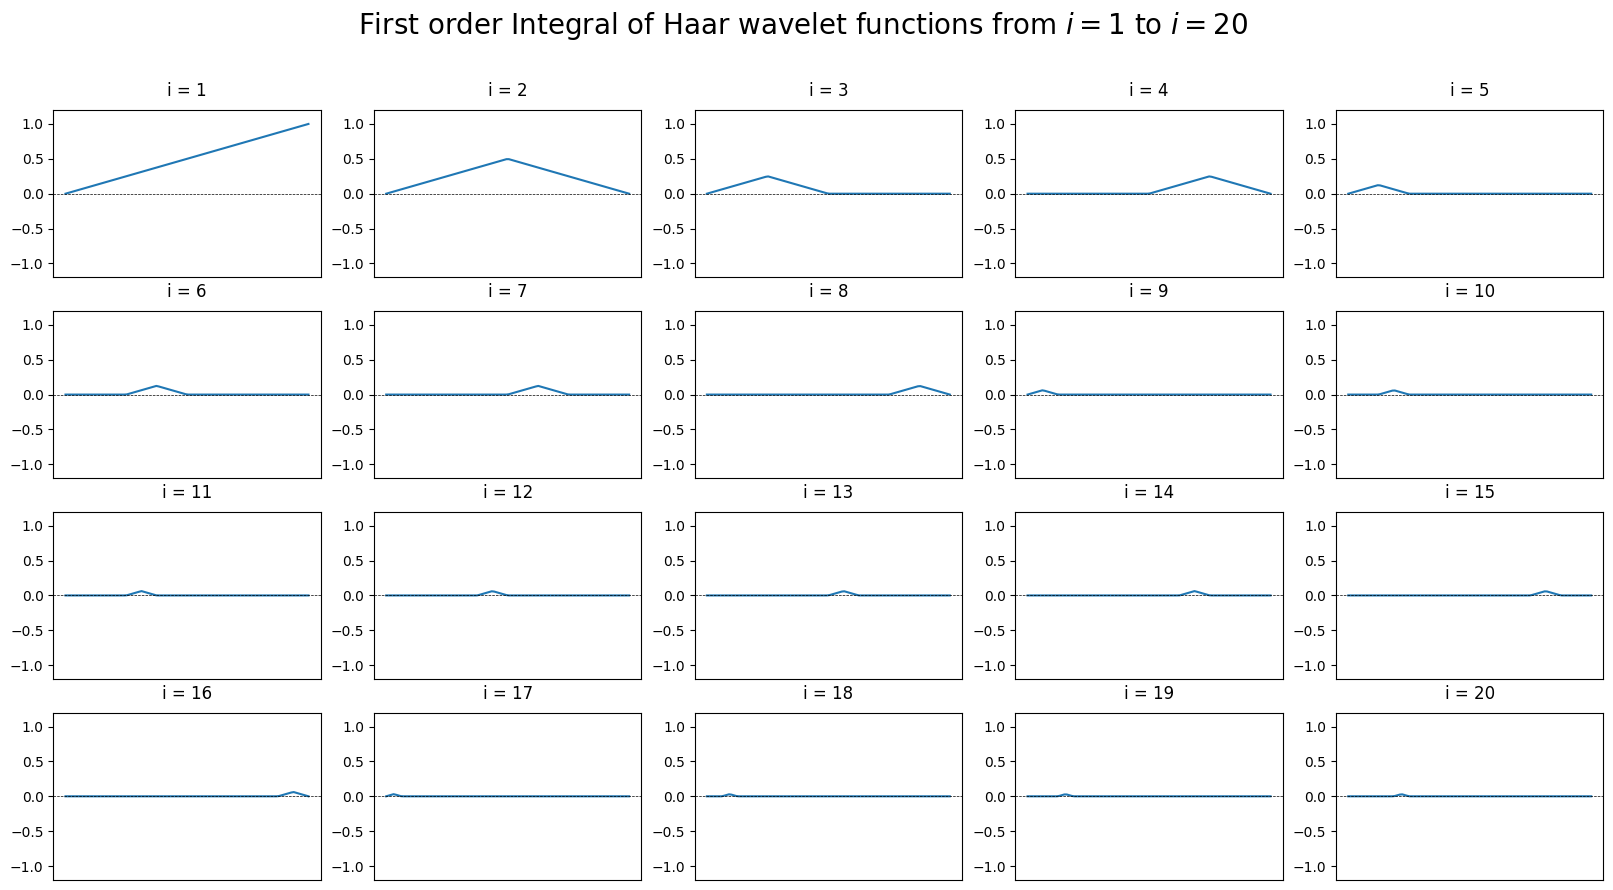

In [8]:
# check the integration of the Haar wavelet function
fig, ax = plt.subplots(4, 5, figsize=(20, 10))
x = np.linspace(0, 1, 100)
for i in range(1, 21):
    ax[int((i - 1) / 5), (i - 1) % 5].plot(x, haar_int_1(x, i))
    ax[int((i - 1) / 5), (i - 1) % 5].get_xaxis().set_visible(False) # make x-axis do not show
    ax[int((i - 1) / 5), (i - 1) % 5].set_title('i = ' + str(i), pad=10)
    ax[int((i - 1) / 5), (i - 1) % 5].set_ylim(-1.2, 1.2)
    ax[int((i - 1) / 5), (i - 1) % 5].axhline(y=0, color='k', linewidth=0.5, linestyle='--')
fig.suptitle('First order Integral of Haar wavelet functions from $i = 1$ to $i = 20$', fontsize=20)
plt.show()

In [9]:
# define the function for the matrix of first-order integration of the haar wavelet function
def haar_int_1_mat(x, N):
    """
    x: input vector
    N: the number of order of the Haar wavelet function

    return: the matrix of the integration of the Haar wavelet function
    """
    mat = np.zeros((N, len(x)))
    for j in range(1, N + 1):
        mat[:, j - 1] = haar_int_1(x, j)
    return mat

In [10]:
# define the collocation points t = (k - 0.5) / N
def collocation(N=64):
    """
    N: the number of collocation points

    return: the collocation points
    """
    return np.linspace(0, 1, N, endpoint=False) + 0.5 / N

We want to get the $u(x)$ as $e^{x}$ when $f(x)=e^{x} + e^{-x}$ and $K(x,t) = -e^{-(x+t)}$ for linear Fredholm Integral Equations
$$
u(x) = f(x) + \int^{1}_{0} K(x,t)u(t)dt
$$

In [11]:
import scipy.integrate as integrate
import numpy as np
x = np.random.uniform(0, 1)
def f (x):
    return np.exp(x) + np.exp(-x)

def K (x, t):
    return -np.exp(-(x + t))

# It shows that the solution of this integral equation is u(x) = exp(x)
result = np.exp(x) - f(x) - integrate.quad(lambda t: K(x, t) * np.exp(t), 0, 1)[0]
print(result)

-1.1102230246251565e-16


In [12]:
N = 64
x = collocation(N)
t = collocation(N)

$$
\sum^{N}_{j = 1}a_{j} A + \frac{1}{1-S_{2}} B \sum^{N}_{j=1}a_{j}S_{1}{(j)} = f(x_{i}) - \frac{f(0)}{1-S_{2}}B\\

\Longrightarrow \sum^{N}_{j = 1} a_{j}\left[ A + \frac{S_{1}(j)}{1-S_{2}}B  \right ] = f(x_{i}) - \frac{f(0)}{1-S_{2}}B
$$

$$
\begin{align*}
& A := p_{j,1}(x_{i}) - \frac{1}{N}\sum^{N}_{k=1}K(x_{i},t_{k})p_{j,1}(t_{k})\\ 
& B := 1 - \frac{1}{N}\sum^{N}_{k=1}K(x_{i},t_{k})
\end{align*}
$$

$$
S_{1}(j) = \frac{1}{N}\sum^{N}_{k=1}K(0,t_{k})p_{j,1}(t_{k}), \quad 
S_2 = \frac{1}{N}\sum^{N}_{k=1}K(0,t_{k})
$$

In [13]:
S_1 = np.zeros(N)
for j in range(N):
    for k in range(N):
        S_1[j] += K(0, t[k]) * haar_int_1(t[k], j+1)
S_1 = 1/N * S_1

In [14]:
S_2 = 0
for k in range(N):
    S_2 += K(0, t[k])
S_2 = 1/N * S_2

In [23]:
M_A = np.zeros((N, N))
for j in range(N):
    for k in range(N):
        M_A[:, j] += K(x, t[k]) * haar_int_1(t[k], j+1)
M_A = haar_int_1_mat(x, N) - 1/N * M_A

In [24]:
V_B = np.zeros(N)
for k in range(N):
    V_B += K(x, t[k])
V_B = 1 - 1/N * V_B

Then we solve the linear system Ax = b, where x is the coeffients of haar basis.

In [25]:
A_ls = M_A + np.outer(V_B, S_1) / (1 - S_2)
B_ls = f(x) - f(0) * V_B / (1 - S_2)

In [26]:
coef_haar = np.linalg.solve(A_ls, B_ls) # solve the linear system Ax = B

In [28]:
# form the result of the approximation
u_haar_approx = np.zeros(N)
for k in range(N):
    u_haar_approx += coef_haar[k] * haar_int_1(x, k + 1)
C1 = 1 / (1 - S_2) * (f(0) + np.dot(coef_haar, S_1))
u_haar_approx += C1
abs_error = np.abs(u_haar_approx - np.exp(x))
# get the one norm of the error
norm = np.linalg.norm(abs_error)
print('The absolute error is: ', norm)

The absolute error is:  2.4120218025558894e-15


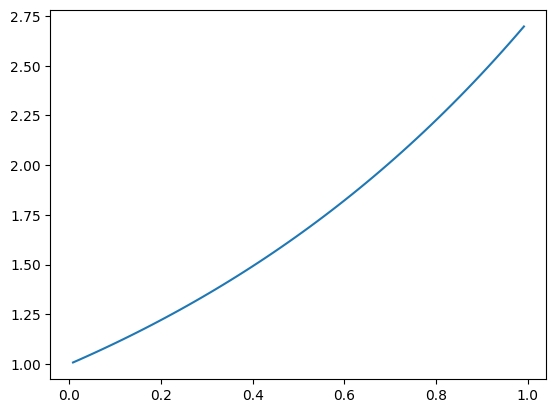

In [29]:
plt.plot(x, u_haar_approx, label='Approximation')

Then we want to solve the first order HOHWM on linear Volterra Integral Equations

$$
u(x) = f(x) + \int^{x}_{0}K(x,t)u(t)dt
$$

$$
\sum^{N}_{j=1}a_{j}\left(p_{j,1}(x_{i}) - \frac{1}{N}\sum^{i}_{k=1}K(x_{i},t_{k})p_{j,1}(t_{k})\right)\\
= f(x_{i}) - f(0) + f(0)
\left(\frac{1}{N}\sum^{i}_{k=1}K(x_{i},t_{k})\right)
, \quad i = 1,2,...N.
$$

In [22]:
N = 64
x = collocation(N)
t = collocation(N)
f = lambda x: 1/2 * x**2 * np.exp(-x)
K = lambda x, t: 1/2 * (x - t)**2 * np.exp(-x + t)

In [23]:
u = lambda x: 1/3 - 1/3 * np.exp(-3/2 * x) * (
    np.cos(np.sqrt(3)/2 * x) + np.sqrt(3) * np.sin(np.sqrt(3)/2 * x))

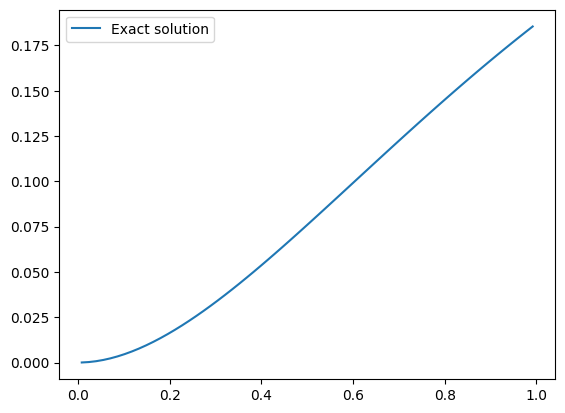

In [24]:
# plot u(x)
plt.plot(x, u(x), label='Exact solution')
plt.legend()

In [25]:
# check the solution
import scipy.integrate as integrate
import numpy as np
x = np.random.uniform(0, 1)

# It shows that the solution of this integral equation is u(x) = exp(x)
result = u(x) - f(x) - integrate.quad(lambda t: K(x, t) * u(t), 0, x)[0]
print(result)

-1.951563910473908e-18


In [26]:
N = 4
x = collocation(N)
t = collocation(N)
f = lambda x: 1/2 * x**2 * np.exp(-x)
K = lambda x, t: 1/2 * (x - t)**2 * np.exp(-x + t)

In [27]:
M_A = np.zeros((N, N))
for i in range(N):
    for j in range(N):
        for k in range(i):
            M_A[i, j] += K(x[i], t[k]) * haar_int_1(t[k], j+1)
M_A = haar_int_1_mat(x, N) - 1/N * M_A

In [28]:
V_B = np.zeros(N)
for i in range(N):
    for k in range(i):
        V_B[i] += K(x[i], t[k])
V_B = f(x) - f(0) - f(0) * (1/N * V_B)

In [29]:
coef_haar = np.linalg.solve(M_A, V_B)

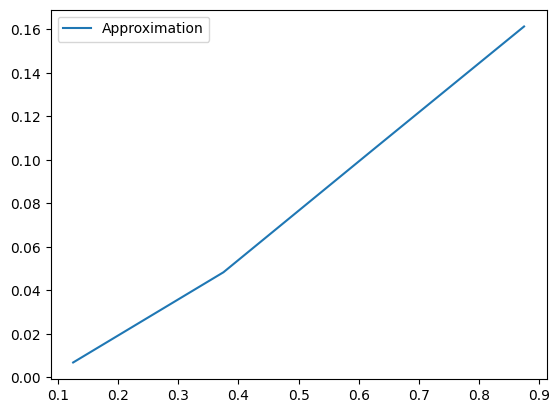

In [30]:
import scipy as sp

coef_haar_new = sp.sparse.linalg.gmres(M_A, V_B, tol=1e-15)
coef_haar_new = np.array(coef_haar_new[0])
u_haar_approx = np.zeros(N)
for k in range(N):
    u_haar_approx += coef_haar_new[k] * haar_int_1(x, k + 1)
u_haar_approx += f(0)
plt.plot(x, u_haar_approx, label='Approximation')
plt.legend()
# coef_haar_new

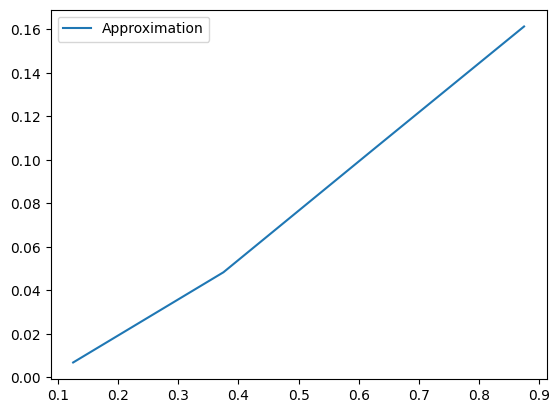

In [31]:
u_haar_approx = np.zeros(N)
for k in range(N):
    u_haar_approx += coef_haar[k] * haar_int_1(x, k + 1)
u_haar_approx += f(0)
plt.plot(x, u_haar_approx, label='Approximation')
plt.legend()

Now we implement second order HOHWM on linear Fredholm Integral Equations

In [122]:
# define the function for second-order integration of the Haar wavelet function
def haar_int_2(x, i):
    """
    x: input vector
    i: the index of the Haar wavelet function

    return: the second-order integration of the Haar wavelet function
    """
    if i == 1:
        return 0.5 * x ** 2
    if i >= 2:
        j, k = index(i) # j is the scale, k is the translation
        m = 2 ** j
        alpha = k / m
        beta = (k + 0.5) / m
        gamma = (k + 1) / m
        a = 1. * (x>=alpha) * (x<beta) * (x - alpha) ** 2 / 2
        b = -1. * (x>=beta) * (x<=gamma) * ((x - gamma) ** 2 / 2 - (beta - alpha) ** 2)
        c = 1. * (x>= gamma) * (x <= 1) * (beta - alpha) ** 2
        if i != 0 and (i & (i - 1)) == 0: # if i is power of 2
            c = 0
        int_2 = a + b + c
        return int_2

def haar_int_2_mat(x, N):
    mat = np.zeros((N, len(x)))
    for j in range(1, N + 1):
        mat[:, j - 1] = haar_int_2(x, j)
    return mat


In [123]:
import scipy.integrate as integrate
import numpy as np
x = np.random.uniform(0, 1)
def f (x):
    return np.exp(x) + np.exp(-x)

def K (x, t):
    return -np.exp(-(x + t))

# It shows that the solution of this integral equation is u(x) = exp(x)
result = np.exp(x) - f(x) - integrate.quad(lambda t: K(x, t) * np.exp(t), 0, 1)[0]
print(result)

-1.6653345369377348e-16


In [124]:
N = 16
x = collocation(N)
t = collocation(N)

In [125]:
S_1 = np.zeros(N)
for j in range(N):
    for k in range(N):
        S_1[j] += K(0, t[k]) * haar_int_1(t[k], j+1)
S_1 = 1/N * S_1

S_2 = 0
for k in range(N):
    S_2 += K(0, t[k])
S_2 = 1/N * S_2


S_3 = 0
for k in range(N):
    S_3 += K(1, t[k])
S_3 = 1/N * S_3

S_4 = 0
for k in range(N):
    S_4 += K(0, t[k]) * t[k]
S_4 = 1/N * S_4

S_5 = 0
for k in range(N):
    S_5 += K(1, t[k]) * t[k]
S_5 = 1/N * S_5

S_6 = np.zeros(N)
for j in range(N):
    for k in range(N):
        S_6[j] += K(0, t[k]) * haar_int_2(t[k], j+1)
S_6 = 1/N * S_6

S_7 = np.zeros(N)
for j in range(N):
    for k in range(N):
        S_7[j] += K(1, t[k]) * haar_int_2(t[k], j+1)
S_7 = 1/N * S_7

S_8 = 1 - S_2 + S_4 * (1 - S_3) - S_5 * (1 - S_2)

In [126]:
A = f(0) * (1 - S_5) + f(1) * S_4

D = -f(0) * (1 - S_3) + f(1) * (1 - S_2)

V_B = np.zeros(N) # maybe wrong
for i in range(N):
    V_B[i] = haar_int_2(1, i + 1)

V_E = (1 - S_5) * S_6 - S_4 * V_B

V_F = (1 - S_3) * S_6 + (1 - S_2) * V_B

In [127]:
M_A = np.zeros((N, N))
for j in range(N):
    for k in range(N):
        M_A[:, j] += K(x, t[k]) * haar_int_2(t[k], j+1)
M_A = haar_int_2_mat(x, N) - 1/N * M_A

V_P = np.zeros(N)
for k in range(N):
    V_P += K(x, t[k])
V_P = 1 - 1/N * V_P

V_Q = np.zeros(N)
for k in range(N):
    V_Q += K(x, t[k]) * t[k]
V_Q = x - 1/N * V_Q

In [128]:
LHS_ls = M_A + np.outer(V_P, V_E) / S_8 - np.outer(V_Q, V_F) / S_8 # if bug, check here
RHS_ls = f(x) - A * V_P / S_8 - D * V_Q / S_8

In [129]:
coef_haar = np.linalg.solve(LHS_ls, RHS_ls)

In [131]:
# form the result of the approximation
u_haar_approx = np.zeros(N)
for k in range(N):
    u_haar_approx += coef_haar[k] * haar_int_2(x, k + 1)
C1 = 1 / S_8 * (A + np.dot(coef_haar, V_E))
C2 = 1 / S_8 * (D - np.dot(coef_haar, V_F))
u_haar_approx += C1 + C2 * x

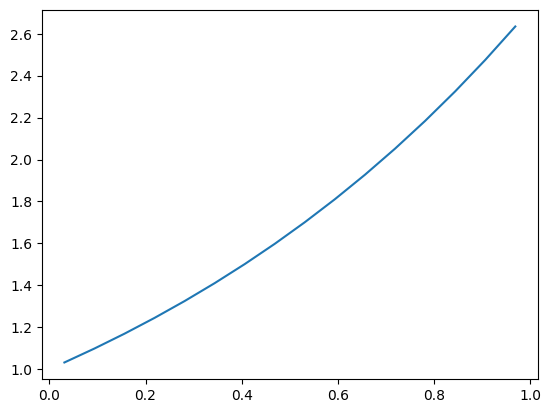

In [132]:
plt.plot(x, u_haar_approx, label='Approximation')